In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
# Charger les données
df = pd.read_csv("fatal-police-shootings-agencies.csv")

df.head()

,id,name,type,state,oricodes,total_shootings
0,3145,Abbeville County Sheriff's Office,sheriff,SC,SC00100,1
1,2576,Aberdeen Police Department,local_police,WA,WA01401,1
2,2114,Abilene Police Department,local_police,TX,TX22101,3
3,2088,Abington Township Police Department,local_police,PA,PA04601,1
4,3187,Acadia Parish Sheriff's Office,sheriff,LA,LA00100,1


In [27]:
# conversion des noms de colonnes en minuscule
df.columns = df.columns.str.lower()
df.head()

,id,name,type,state,oricodes,total_shootings
0,3145,Abbeville County Sheriff's Office,sheriff,SC,SC00100,1
1,2576,Aberdeen Police Department,local_police,WA,WA01401,1
2,2114,Abilene Police Department,local_police,TX,TX22101,3
3,2088,Abington Township Police Department,local_police,PA,PA04601,1
4,3187,Acadia Parish Sheriff's Office,sheriff,LA,LA00100,1


In [28]:

# Afficher les statistiques descriptives des données (numérique)
df.describe()


,id,total_shootings
count,3310.000000,3310.000000
mean,2892.218429,2.833837
std,4230.344340,6.044626
min,1.000000,1.000000
25%,1203.250000,1.000000
50%,2091.500000,1.000000
75%,2985.750000,2.000000
max,28840.000000,129.000000


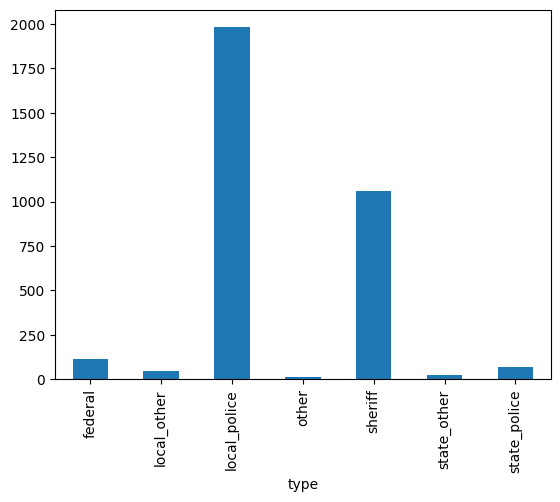

<Figure size 1000x1000 with 0 Axes>

In [29]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join

# Charger les données
df = pd.read_csv("fatal-police-shootings-agencies.csv")

# conversion des noms de colonnes en minuscule
df.columns = df.columns.str.lower()

# Afficher un histogramme de la distribution des type par shooting
df_shootings = df.groupby('type').size()
df_shootings.plot(kind='bar')
plt.figure(figsize=(10, 10))
plt.show()


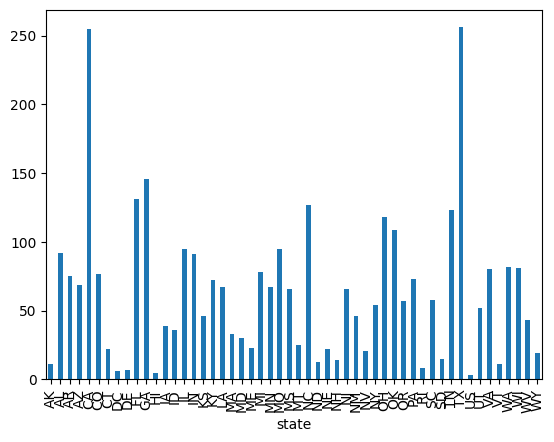

<Figure size 1600x1200 with 0 Axes>

In [30]:
#display the numbers of shooting per states
df_states = df.groupby('state').size()
df_states.plot(kind='bar')
#faire une grande figure
fig=plt.figure(figsize=(16,12))
plt.show()


In [31]:
# Afficher les valeurs nulles dans le DataFrame
df.isnull().sum()


id                   0
name                 0
type                 0
state                0
oricodes           102
total_shootings      0
dtype: int64

In [32]:
# Supprimer la colonne "name" et "passengerid" car elles ne servent à rien pour du ML
df = df.drop(["oricodes"], axis=1)

In [33]:
df.type.unique()

array(['sheriff', 'local_police', 'state_police', 'state_other', 'other',
       'federal', 'local_other'], dtype=object)

In [34]:
df.	state.unique()
#attribute an id to each state
df['state_id'] = df['state'].factorize()[0]
df.head()

,id,name,type,state,total_shootings,state_id
0,3145,Abbeville County Sheriff's Office,sheriff,SC,1,0
1,2576,Aberdeen Police Department,local_police,WA,1,1
2,2114,Abilene Police Department,local_police,TX,3,2
3,2088,Abington Township Police Department,local_police,PA,1,3
4,3187,Acadia Parish Sheriff's Office,sheriff,LA,1,4


In [35]:
df.name.unique()


array(["Abbeville County Sheriff's Office", 'Aberdeen Police Department',
       'Abilene Police Department', ..., 'Yuma Police Department',
       "Zapata County Sheriff's Department", 'Zion Police Department'],
      dtype=object)

In [36]:
#drop id column 
X = df.drop(["state", "name", "total_shootings"], axis=1)

In [37]:
# Créer une liste des colonnes catégorielles
categorical_columns = ["type"]
# Créer des colonnes hot encoder pour chaque colonne catégorielle
for column in categorical_columns:
    df = pd.get_dummies(df, columns=[column])

df

,id,name,state,total_shootings,state_id,type_federal,type_local_other,type_local_police,type_other,type_sheriff,type_state_other,type_state_police
0,3145,Abbeville County Sheriff's Office,SC,1,0,False,False,False,False,True,False,False
1,2576,Aberdeen Police Department,WA,1,1,False,False,True,False,False,False,False
2,2114,Abilene Police Department,TX,3,2,False,False,True,False,False,False,False
3,2088,Abington Township Police Department,PA,1,3,False,False,True,False,False,False,False
4,3187,Acadia Parish Sheriff's Office,LA,1,4,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
3305,226,Yuba County Sheriff's Office,CA,5,17,False,False,False,False,True,False,False
3306,1874,Yuma County Sheriff's Department,AZ,3,34,False,False,False,False,True,False,False
3307,1360,Yuma Police Department,AZ,3,34,False,False,True,False,False,False,False
3308,3077,Zapata County Sheriff's Department,TX,1,2,False,False,False,False,True,False,False


In [38]:
#from sklearn.preprocessing import OneHotEncoder

#OneHotEncoder().fit_transform(df["type"])

In [39]:

df.head()

,id,name,state,total_shootings,state_id,type_federal,type_local_other,type_local_police,type_other,type_sheriff,type_state_other,type_state_police
0,3145,Abbeville County Sheriff's Office,SC,1,0,False,False,False,False,True,False,False
1,2576,Aberdeen Police Department,WA,1,1,False,False,True,False,False,False,False
2,2114,Abilene Police Department,TX,3,2,False,False,True,False,False,False,False
3,2088,Abington Township Police Department,PA,1,3,False,False,True,False,False,False,False
4,3187,Acadia Parish Sheriff's Office,LA,1,4,False,False,False,False,True,False,False


In [40]:
#attribute an id to each name
df['name_id'] = df['name'].factorize()[0]
df.head()

,id,name,state,total_shootings,state_id,type_federal,type_local_other,type_local_police,type_other,type_sheriff,type_state_other,type_state_police,name_id
0,3145,Abbeville County Sheriff's Office,SC,1,0,False,False,False,False,True,False,False,0
1,2576,Aberdeen Police Department,WA,1,1,False,False,True,False,False,False,False,1
2,2114,Abilene Police Department,TX,3,2,False,False,True,False,False,False,False,2
3,2088,Abington Township Police Department,PA,1,3,False,False,True,False,False,False,False,3
4,3187,Acadia Parish Sheriff's Office,LA,1,4,False,False,False,False,True,False,False,4


In [55]:
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Séparer les données en données d'entraînement, de validation et de test
X = df.drop(["state", "name", "total_shootings"], axis=1)
y = df["total_shootings"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
df.columns

Index(['id', 'name', 'state', 'total_shootings', 'state_id', 'type_federal',
       'type_local_other', 'type_local_police', 'type_other', 'type_sheriff',
       'type_state_other', 'type_state_police', 'name_id'],
      dtype='object')

In [57]:
X_train.shape

(2648, 10)

In [58]:
# Normaliser les données numériques
scaler = StandardScaler()
#scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [59]:
X_train

array([[ 0.02762301,  0.76261687, -0.19184632, ..., -0.08940867,
        -0.14428191,  1.03179558],
       [ 0.17315117,  0.84249226, -0.19184632, ..., -0.08940867,
        -0.14428191, -1.69161547],
       [ 5.63021629,  1.32174457,  5.21250542, ..., -0.08940867,
        -0.14428191,  1.42965255],
       ...,
       [-0.26801119, -0.35563852, -0.19184632, ..., -0.08940867,
        -0.14428191, -0.41058992],
       [ 1.71830366, -0.11601236, -0.19184632, ..., -0.08940867,
        -0.14428191, -0.84047253],
       [-0.65231155,  1.48149534, -0.19184632, ..., -0.08940867,
        -0.14428191,  1.56514564]])

 ### The model below is not adapted to the prediction I want to evaluate with the data set. It's not a binary prediction or evaluation (0 or 1). It's an evaluation of numerical data => which can go from n to infinity. So a regression.          We thought of a RegressionTree model of linear regression 

In [60]:
""" import time

# get the start time

# Entraîner un modèle de régression logistique
malist = ["lbfgs", "liblinear", "newton-cg", "sag", "saga"]

for mod in malist:
    st = time.time()
    model = LogisticRegression(solver=mod, max_iter=1000)
    et = time.time()
    model.fit(X_train, y_train)
    print(et-st,mod,model.score(X_train, y_train))  """

' import time\n\n# get the start time\n\n# Entraîner un modèle de régression logistique\nmalist = ["lbfgs", "liblinear", "newton-cg", "sag", "saga"]\n\nfor mod in malist:\n    st = time.time()\n    model = LogisticRegression(solver=mod, max_iter=1000)\n    et = time.time()\n    model.fit(X_train, y_train)\n    print(et-st,mod,model.score(X_train, y_train))  '

In [61]:
""" 
# Recherche d'hyperparamètres
parameters = {"C": np.arange(0.1, 10, 0.1)}
grid_search = GridSearchCV(model, parameters, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

# Meilleur modèle
best_model = grid_search.best_estimator_

# Évaluer le meilleur modèle sur les données de test
print("Accuracy sur les données de test :", best_model.score(X_test, y_test)) """

' \n# Recherche d\'hyperparamètres\nparameters = {"C": np.arange(0.1, 10, 0.1)}\ngrid_search = GridSearchCV(model, parameters, cv=5, scoring="accuracy")\ngrid_search.fit(X_train, y_train)\n\n# Meilleur modèle\nbest_model = grid_search.best_estimator_\n\n# Évaluer le meilleur modèle sur les données de test\nprint("Accuracy sur les données de test :", best_model.score(X_test, y_test)) '

In [62]:
import time

# get the start time

# Entraîner un modèle de regression tree
from sklearn.tree import DecisionTreeRegressor
start_time = time.time()
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_score = dt.score(X_test, y_test)
print("DecisionTreeRegressor score: ", dt_score)


DecisionTreeRegressor score:  -1.1345993577116094
